In [2]:
import numpy as np
import pandas as pd

from sklearn import linear_model 
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import seaborn as sns

import math
import warnings
%matplotlib inline 

import os
import subprocess

## Data Cleaning

In [88]:
train_data = pd.read_csv("train.csv")

In [89]:
test_data = pd.read_csv("test.csv")

In [90]:
data = []
data.append( train_data)
data.append(test_data)

In [91]:
data[0].head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [92]:
data[1].head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


Let's deal with cleaning the training data

In [93]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [94]:
null_values = data[0].isnull().sum()

Let's get all the object data types ~> we'll need to encode these values later, drop them, or perform PCA

In [126]:
##time ~> O(n)
##space ~> O(n)
objects = set()
data_types = data[0].dtypes
i = 0
for c in data[0]:
    if data_types[i] == 'object':
        objects.add(c)
    i += 1

Let's aggregate all the columns with null_values

In [127]:
##time ~> O(n)
##space ~> O(n)
i = 0
null_columns = set()
for v in null_values:
    if v > 0:
            null_columns.add(null_values.axes[0][i])
    i += 1

Let's get rid of all NaN values in the trainning set

In [128]:
for c in data[0]:
    if c in null_columns:
        data[0][c].fillna(data[0][c].mode()[0],inplace=True)

Let's encode all the 'object' types

In [129]:
encoder = LabelEncoder()

In [130]:
for c in data[0]:
    if c in objects:
        data[0][c] = encoder.fit_transform(data[0][c])

Let's clean the test data

In [135]:
data[1].isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [133]:
##time ~> O(n)
##space ~> O(n)
objects = set()
data_types = data[1].dtypes
i = 0
for c in data[1]:
    if data_types[i] == 'object':
        objects.add(c)
    i += 1

In [136]:
##time ~> O(n)
##space ~> O(n)
i = 0
null_values = data[1].isnull().sum()
null_columns = set()
for v in null_values:
    if v > 0:
            null_columns.add(null_values.axes[0][i])
    i += 1

In [137]:
for c in data[1]:
    if c in null_columns:
        data[1][c].fillna(data[1][c].mode()[0],inplace=True)

In [138]:
encoder = LabelEncoder()

In [140]:
for c in data[1]:
    if c in objects:
        data[1][c] = encoder.fit_transform(data[1][c])

In [148]:
target = data[0]["SalePrice"]

In [149]:
target.head(6)

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
Name: SalePrice, dtype: int64

## PCA

In [166]:
standard_scaler = StandardScaler()
pca = PCA(n_components=55)
principal_components = pca.fit_transform(standard_scaler.fit_transform(data[0]))

Text(0.5,0,'Principal Components')

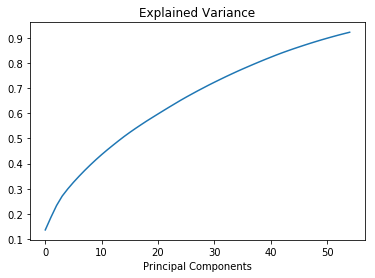

In [167]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance')
plt.xlabel("Principal Components")

## Data Exploration

In [169]:
data[0].head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,0,0,3,0,...,0,2,2,2,700,10,2009,8,4,143000


Text(0.5,1,'SalePrice Histogram')

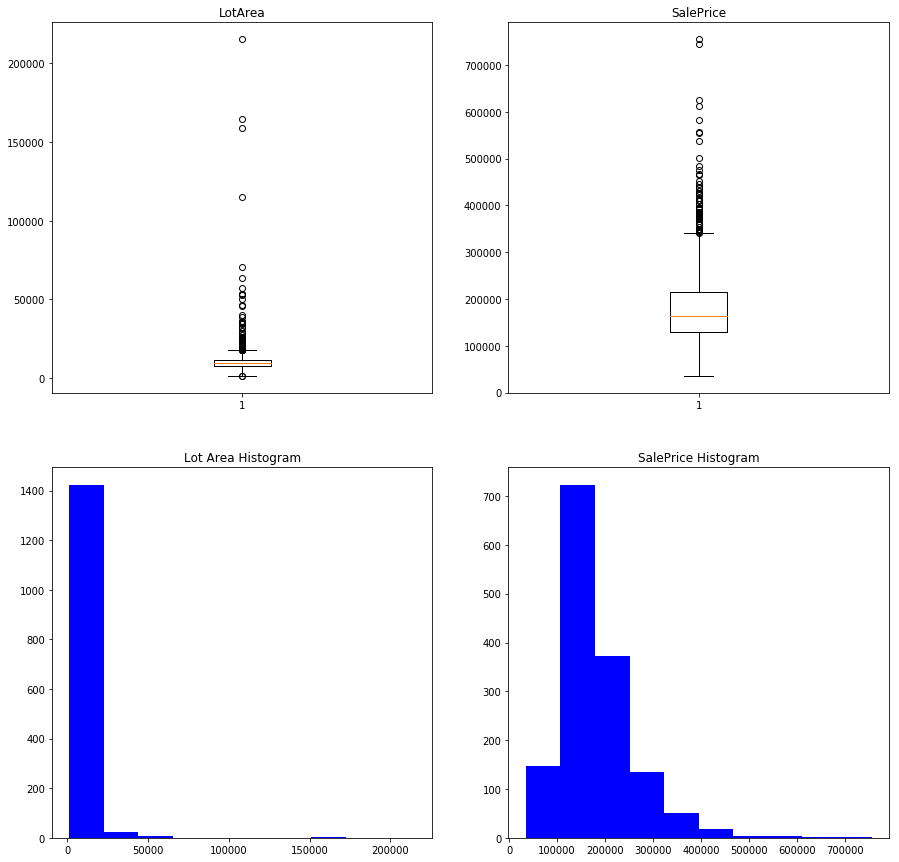

In [174]:
fig, ax = plt.subplots(2,2,figsize = (15,15))

plt1 = ax[0][0]
plt2 = ax[0][1]
plt3 = ax[1][0]
plt4 = ax[1][1]

plt1.boxplot(
                            x = data[0]['LotArea'],
                            meanline=True
)
plt1.set_title("LotArea")

plt2.boxplot(
                        x = data[0]['SalePrice'],
                        meanline=True
)
plt2.set_title("SalePrice")

plt3.hist(
                    x = data[0]['LotArea'],
                    color = ['b'],
                    label = ['LotArea']
)
plt3.set_title("Lot Area Histogram")


plt4.hist(
                    x = data[0]['SalePrice'],
                    color = ['b'],
                    label = ['SalePrice']
)
plt4.set_title ("SalePrice Histogram")

## Data Modelling

In [188]:
train_data = data[0].copy(deep=True)
train_data.drop(['SalePrice','Id'],axis=1,inplace=True)

In [193]:
mid = int(train_data.shape[0]/2)

In [198]:
train_vals = train_data.values[0: mid , :]
test_vals = train_data.values[mid : , : ]
target_vals = target.values[0 : mid : ]
test_target_vals = target.values[mid : ]

In [199]:
train_vals.shape

(730, 79)

In [200]:
test_vals.shape

(730, 79)

In [201]:
target_vals.shape

(730,)

In [202]:
test_target_vals.shape

(730,)

In [210]:
principal_cmpnts = principal_components[0:mid,:]
principal_cmpnts_test = principal_components[mid:,:]

In [211]:
principal_cmpnts_test.shape

(730, 55)

In [212]:
principal_cmpnts_test.shape

(730, 55)

### Linear Model

In [204]:
regr = linear_model.LinearRegression()
regr.fit(train_vals,target_vals)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [205]:
y_hat = regr.predict(test_vals)

In [206]:
y_hat

array([231670.56379584, 227436.5567521 , 236591.55788641, 138003.88619861,
       106051.07512456, 180819.44387217,  60932.11555222, 237316.15406168,
       119814.01138214, 200713.98028463, 106827.00405345, 153060.36592091,
       174598.18974558, 155978.83216351, 205306.75848201, 311562.03377858,
       235069.55688436, 249198.82097995, 242197.2554688 , 102609.44049496,
        62154.69431249, 163682.46293654, 207204.84838303, 277189.24636188,
       165116.92335794, 157822.76977206, 222208.54204271, 127850.26335672,
       166834.74851211, 284925.92547971, 116825.39995421, 123593.23371092,
       195626.24050772, 307024.52465515, 257702.36978019, 270825.25030972,
       188914.84876771, 182143.9254707 , 237362.58695216, 432685.20521029,
       132342.87394332, 131113.10894963, 131950.91406908, 115011.8704652 ,
       296899.27344974, 158604.32796339, 240348.0919531 , 143383.54937801,
       167733.80730317, 144382.72195015, 160981.3241145 , 190572.61739677,
       194175.07523425, 1

In [207]:
test_error = metrics.mean_squared_error(y_hat,test_target_vals)/2

In [208]:
test_error

650987385.2029902

Okay that was pretty bad ... what about with principal components?

In [213]:
regr.fit(principal_cmpnts,target_vals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [214]:
y_hat = regr.predict(principal_cmpnts_test)

In [215]:
test_error = metrics.mean_squared_error(y_hat,test_target_vals)

In [216]:
test_error

3953631906.44362